### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [8]:
coupons_data = pd.read_csv('data/coupons.csv')

In [9]:
coupons_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
# Checking for missing values
missing_values = coupons_data.isnull().sum()

# Checking data types
data_types = coupons_data.dtypes

# Summary of missing values and data types
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})
missing_values_summary

,Missing Values,Data Type
destination,0,object
passanger,0,object
weather,0,object
temperature,0,int64
time,0,object
coupon,0,object
expiration,0,object
gender,0,object
age,0,object
maritalStatus,0,object


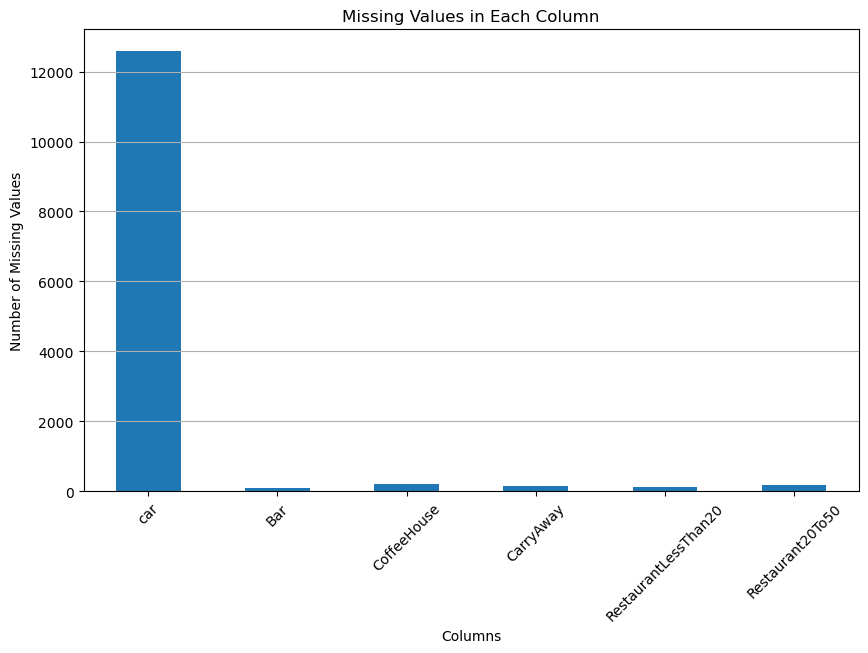

In [11]:
# Filter out columns with missing values
missing_values_filtered = missing_values[missing_values > 0]

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_values_filtered.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

# Missing Values:

The car column has a significant number of missing values (12,576 entries).
Other columns with missing values include Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50, though these have fewer missing entries compared to car.

3. Decide what to do about your missing data -- drop, replace, other...

In [35]:
# Dropping the 'car' column
coupons_data_dropped = coupons_data.drop('car', axis=1)

# Display the first few rows of the modified dataset to confirm the change
coupons_data_dropped.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [36]:
# Calculate the proportion of coupons accepted
total_coupons = len(coupons_data_dropped)
accepted_coupons = coupons_data_dropped['Y'].sum()
proportion_accepted = accepted_coupons / total_coupons

proportion_accepted

0.5684326710816777

The proportion of observations where the coupon was accepted is approximately 56.84%. This means that in about 56.84% of the cases, the participants chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

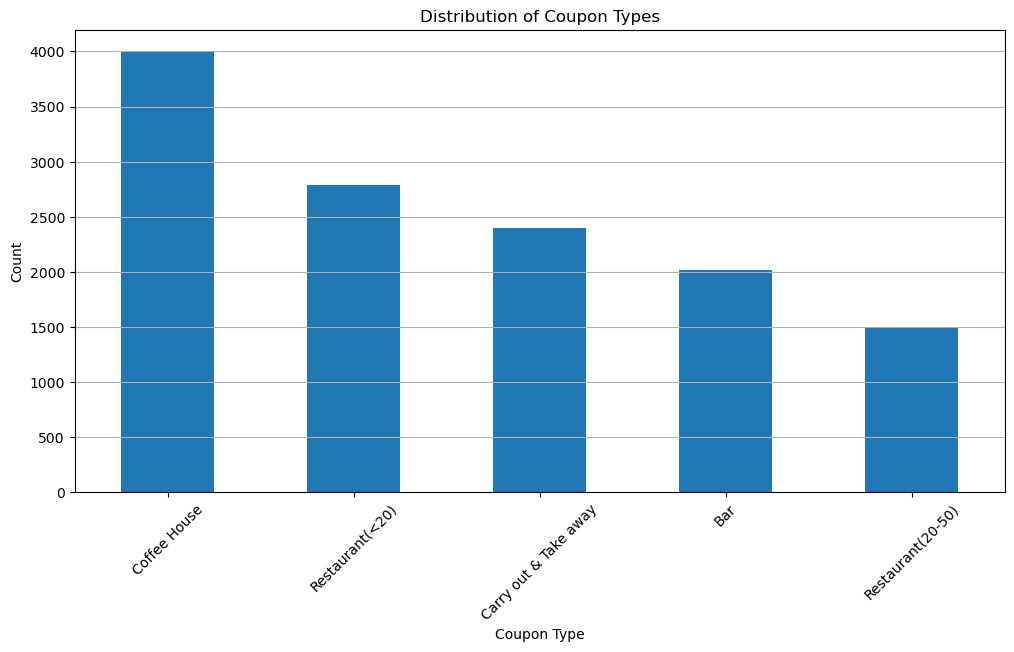

In [37]:
# Count the occurrences of each coupon type
coupon_counts = coupons_data_dropped['coupon'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
coupon_counts.plot(kind='bar')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


Based on the above visualization a large percentage seems to use the coffee house coupon

6. Use a histogram to visualize the temperature column.

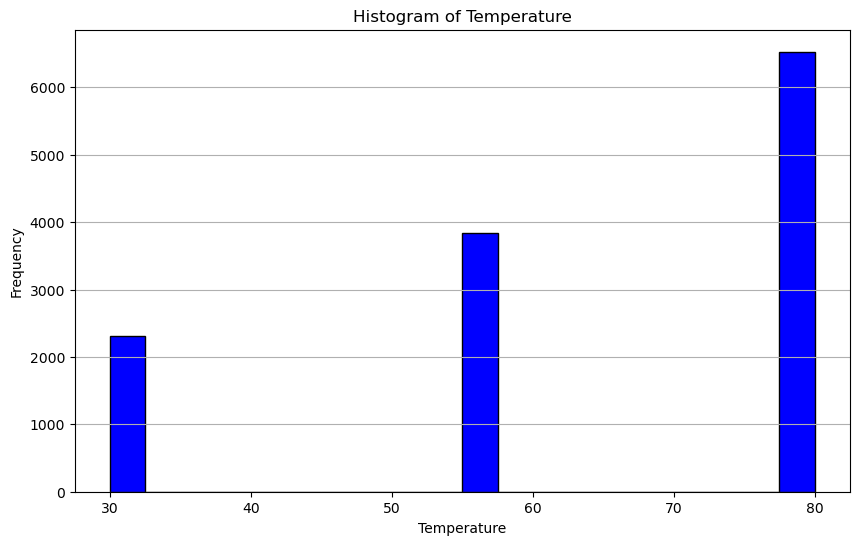

In [38]:
# Create a histogram for the temperature column
plt.figure(figsize=(10, 6))
plt.hist(coupons_data_dropped['temperature'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Show the plot
plt.show()


Historgram of Temperatuve vs coupon usage

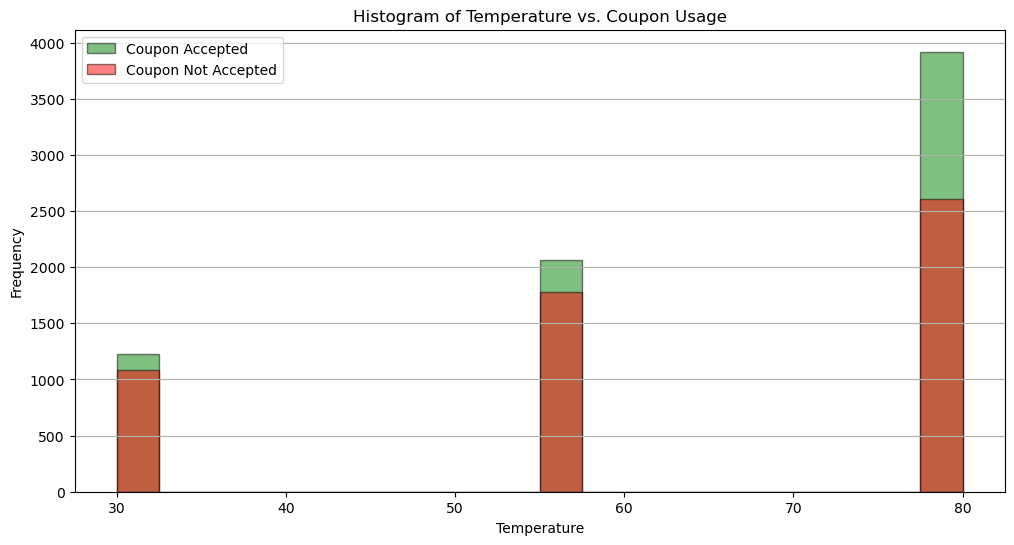

In [39]:
# Separate the dataset into two groups based on coupon acceptance
accepted_coupons = coupons_data_dropped[coupons_data_dropped['Y'] == 1]
not_accepted_coupons = coupons_data_dropped[coupons_data_dropped['Y'] == 0]

# Create the histogram
plt.figure(figsize=(12, 6))

# Histogram for accepted coupons
plt.hist(accepted_coupons['temperature'], bins=20, alpha=0.5, label='Coupon Accepted', color='green', edgecolor='black')

# Histogram for not accepted coupons
plt.hist(not_accepted_coupons['temperature'], bins=20, alpha=0.5, label='Coupon Not Accepted', color='red', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Temperature vs. Coupon Usage')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [40]:
# Create a new DataFrame with only bar coupons
bar_coupons_df = coupons_data_dropped[coupons_data_dropped['coupon'].str.contains('Bar', case=False)]

# Display the first few rows of the new DataFrame
bar_coupons_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [41]:
# Calculate the proportion of bar coupons accepted
total_bar_coupons = len(bar_coupons_df)
accepted_bar_coupons = bar_coupons_df['Y'].sum()
proportion_accepted_bar = accepted_bar_coupons / total_bar_coupons

proportion_accepted_bar


0.41001487357461575

The proportion of bar coupons that were accepted is approximately 41.00%. This means that in about 41% of the cases where a bar coupon was offered, the participants chose to accept it.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [42]:
# Filtering the dataset based on the frequency of bar visits
bar_3_or_fewer = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', 'less1', '1~3'])]
bar_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]

# Calculate the acceptance rate for each group
acceptance_rate_3_or_fewer = bar_3_or_fewer['Y'].sum() / len(bar_3_or_fewer)
acceptance_rate_more_than_3 = bar_more_than_3['Y'].sum() / len(bar_more_than_3)

acceptance_rate_3_or_fewer, acceptance_rate_more_than_3


(0.37061769616026713, 0.7688442211055276)

The acceptance rate of bar coupons differs significantly between the two groups:

For those who went to a bar 3 or fewer times a month, the acceptance rate of bar coupons is approximately 37.06%.
For those who went to a bar more than 3 times a month, the acceptance rate of bar coupons is approximately 76.88%.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
# Convert 'age' column to numeric, handling non-numeric entries
bar_coupons_df['age_numeric'] = pd.to_numeric(bar_coupons_df['age'], errors='coerce')

# Filter the dataset for the specified groups
group_1 = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age_numeric'] > 25)]
group_2 = bar_coupons_df.drop(group_1.index)

# Calculate the acceptance rate for each group
acceptance_rate_group_1 = group_1['Y'].sum() / len(group_1)
acceptance_rate_group_2 = group_2['Y'].sum() / len(group_2)

acceptance_rate_group_1, acceptance_rate_group_2


C:\Users\bgundab\AppData\Local\Temp\ipykernel_33292\1563931312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['age_numeric'] = pd.to_numeric(bar_coupons_df['age'], errors='coerce')


(0.6997167138810199, 0.3485576923076923)

The acceptance rates for bar coupons are as follows:

For drivers who go to a bar more than once a month and are over the age of 25, the acceptance rate is approximately 69.97%.
For all other individuals in the dataset, the acceptance rate is approximately 34.86%.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [44]:
# Filter the dataset for the specified group
specific_group = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_df['passanger'] != 'Kid(s)') &
    (~bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry']))
]
other_group = bar_coupons_df.drop(specific_group.index)

# Calculate the acceptance rate for each group
acceptance_rate_specific_group = specific_group['Y'].sum() / len(specific_group)
acceptance_rate_other_group = other_group['Y'].sum() / len(other_group)

acceptance_rate_specific_group, acceptance_rate_other_group


(0.7132486388384754, 0.296043656207367)

The acceptance rates for bar coupons are as follows:

For drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry, the acceptance rate is approximately 71.32%.
For all other individuals in the dataset, the acceptance rate is approximately 29.60%.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [45]:
# Group 1: Go to bars more than once a month, passengers not kids, not widowed
group_1 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_df['passanger'] != 'Kid(s)') & 
    (bar_coupons_df['maritalStatus'] != 'Widowed')
]

# Group 2: Go to bars more than once a month, under 30 years old
group_2 = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_coupons_df['age_numeric'] < 30)
]

# Group 3: Go to cheap restaurants more than 4 times a month, income less than 50K
group_3 = bar_coupons_df[
    (bar_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (bar_coupons_df['income'].str.contains('Less than $50000', case=False, na=False))
]

# Calculate the acceptance rates for each group
acceptance_rate_group_1 = group_1['Y'].sum() / len(group_1) if len(group_1) > 0 else 0
acceptance_rate_group_2 = group_2['Y'].sum() / len(group_2) if len(group_2) > 0 else 0
acceptance_rate_group_3 = group_3['Y'].sum() / len(group_3) if len(group_3) > 0 else 0

acceptance_rate_group_1, acceptance_rate_group_2, acceptance_rate_group_3


(0.7132486388384754, 0.7313432835820896, 0)

The acceptance rates for bar coupons among the three specified groups of drivers are as follows:

For drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed, the acceptance rate is approximately 71.32%.
For drivers who go to bars more than once a month and are under the age of 30, the acceptance rate is approximately 73.13%.
For drivers who go to cheap restaurants more than 4 times a month and have an income of less than $50K, the acceptance rate is 0%

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations and analyses conducted on the dataset regarding drivers who accepted bar coupons, several hypotheses can be formulated:

# Frequency of Bar Visits Influences Acceptance Rates: 

Drivers who frequently visit bars (more than once a month) have a higher likelihood of accepting bar coupons. This trend suggests that familiarity and interest in bar environments significantly increase the appeal of such coupons.

# Age and Marital Status Factor: 
Younger drivers, especially those under 30, and those who are not widowed, tend to accept bar coupons at higher rates. This could be due to lifestyle choices, social habits, or preferences that vary with age and marital status.

# Passenger Type Matters: 
Drivers accompanied by passengers other than kids are more likely to accept bar coupons. This might indicate that the social context (e.g., being with friends or adult family members) makes the idea of visiting a bar more appealing.

# Occupational and Income Influence: 
Drivers whose occupation is not in farming, fishing, or forestry, and those with certain income levels, show different rates of coupon acceptance. This variation might be related to the lifestyle, disposable income, and leisure time associated with different occupations and income levels.

# Restaurant Visiting Habits: 
The data showed that drivers who frequently visit cheaper restaurants and have a lower income might not be the target audience for bar coupons, as indicated by a lower acceptance rate in this group. This could be due to differing entertainment and spending preferences.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's proceed with analyzing the "Coffee House" coupon type. We'll start by creating a new DataFrame for this coupon type and then explore various aspects such as passenger type, age, income, and other relevant factors

# Acceptance Rate by Passenger Type: 

The first plot shows the acceptance rate of Coffee House coupons for different types of passengers (like alone, with friends, etc.). This helps to understand which passenger configurations are more likely to accept these coupons.

C:\Users\bgundab\AppData\Local\Temp\ipykernel_33292\3677243501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_house_coupons_df['age_numeric'] = pd.to_numeric(coffee_house_coupons_df['age'], errors='coerce')
C:\Users\bgundab\AppData\Local\Temp\ipykernel_33292\3677243501.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_house_coupons_df['age_group'] = pd.cut(coffee_house_coupons_df['age_numeric'], bins=age_bins)


Text(0.5, 0, 'Passenger Type')

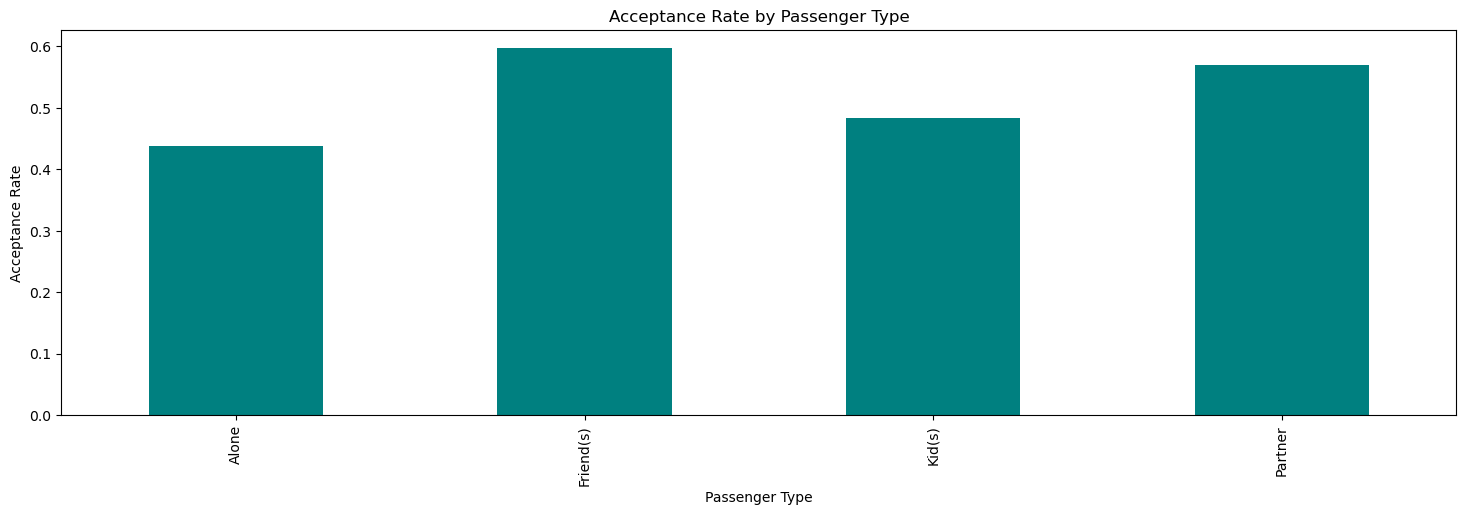

In [50]:
# Create a new DataFrame for Coffee House coupons
coffee_house_coupons_df = coupons_data_dropped[coupons_data_dropped['coupon'] == 'Coffee House']

# Visualizations to understand the characteristics of passengers who accept these coupons

# 1. Acceptance rate by passenger type
passenger_type_acceptance = coffee_house_coupons_df.groupby('passanger')['Y'].mean()

# 2. Acceptance rate by age
coffee_house_coupons_df['age_numeric'] = pd.to_numeric(coffee_house_coupons_df['age'], errors='coerce')
age_bins = [0, 20, 30, 40, 50, 60, 100]
coffee_house_coupons_df['age_group'] = pd.cut(coffee_house_coupons_df['age_numeric'], bins=age_bins)
age_group_acceptance = coffee_house_coupons_df.groupby('age_group')['Y'].mean()

# 3. Acceptance rate by income
income_acceptance = coffee_house_coupons_df.groupby('income')['Y'].mean()

# Plotting the visualizations
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Passenger Type Acceptance Rate
passenger_type_acceptance.plot(kind='bar', color='teal')
plt.title('Acceptance Rate by Passenger Type')
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger Type')



# Acceptance Rate by Age Group: 

The second plot categorizes passengers into different age groups and shows the acceptance rate for each group. This visualization helps identify if certain age groups are more inclined to accept Coffee House coupons.

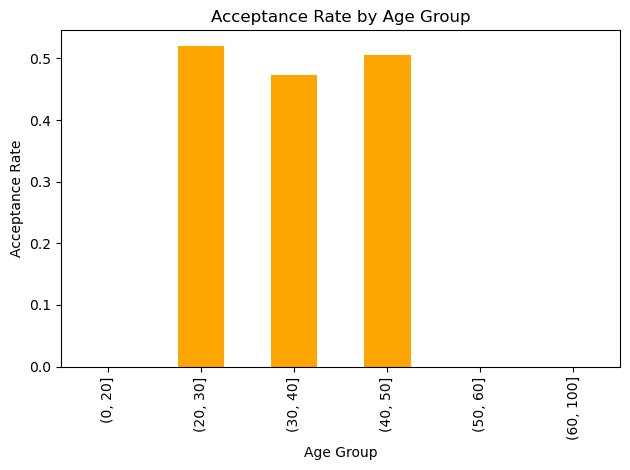

In [51]:

# Age Group Acceptance Rate
age_group_acceptance.plot(kind='bar', color='orange')
plt.title('Acceptance Rate by Age Group')
plt.ylabel('Acceptance Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

# Acceptance Rate by Income: 

The third plot breaks down the acceptance rate by the passengers' income levels. This can reveal whether income influences the likelihood of accepting Coffee House coupons.

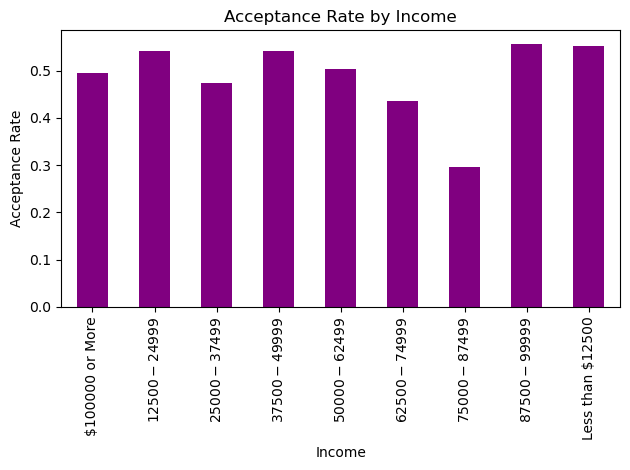

In [52]:

# Income Acceptance Rate
income_acceptance.plot(kind='bar', color='purple')
plt.title('Acceptance Rate by Income')
plt.ylabel('Acceptance Rate')
plt.xlabel('Income')

plt.tight_layout()
plt.show()